<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Gitau/blob/master/SAMUEL_GITAU_IP_CORE_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAMUEL GITAU

WEEK 4 INDEPENDENT PROJECT

MORINGA SCHOOL CORE





# OVERVIEW

We have Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. The claim made is that the days of the week affect the number of Blue cars taken and returned to a station. Number of Bluecars are more than 1000 from day 4-6.

H0  Bluecars < /= 1000 from day 4-6

H1  Bluecars > 1000 from day 4-6 (claim)

Here is the detailed Autolib hypothesis testing report:

 https://docs.google.com/document/d/1OFIvYEPHSBw5Lhat46HPV5BZzwaLOCskQcRZjUeOxUY/edit?usp=sharing. 



The dataset to be used to investigate our research question is from http://bit.ly/DSCoreAutolibDataset. Here is a glossary to help understand the dataset http://bit.ly/DSCoreAutolibDatasetGlossary. 

The dataset contains information about which cars were taken and returned to the stations, on different times and days. 


# IMPORTING LIBRARIES

In [0]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Loading the datasets
# Dataset url http://bit.ly/DSCoreAutolibDataset
df = pd.read_csv("autolib_daily_events_postal_code.csv")
df.head()



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# CHECKING THE DATA


In [7]:
# Determing the number of records in our dataset
df.shape

(16085, 13)

In [8]:
# Previewing the first records of our dataset
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [9]:
# Previewing the last records of our dataset
df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [10]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# CLEANING THE DATASET

In [11]:
# Capitalize column names for uniformity
df.columns = df.columns.str.strip().str.upper()
df

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [12]:
# Check for missing Data
#
df.isnull().sum()

POSTAL CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [13]:
# change data type for dates

from datetime import datetime
pd.to_datetime(df['DATE'])


0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: DATE, Length: 16085, dtype: datetime64[ns]

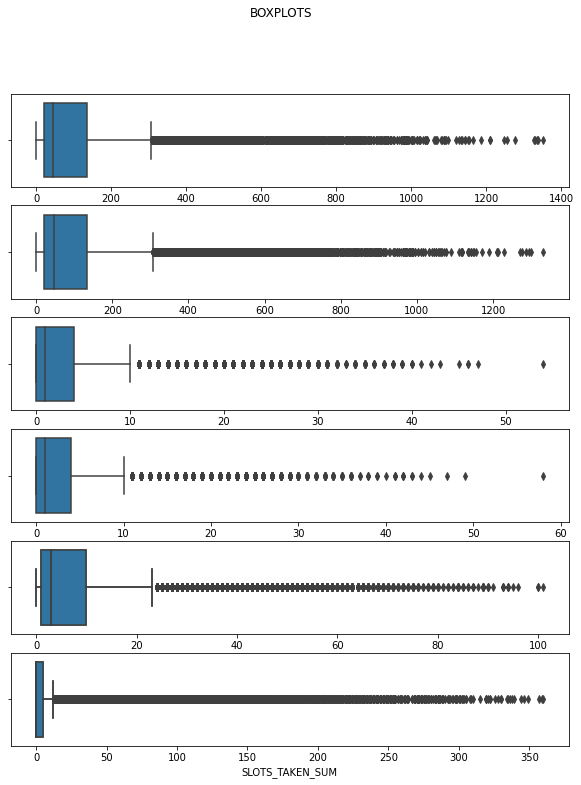

In [14]:
# Cheking for outliers

fig, (ax1, ax2,ax3,ax4, ax5, ax6) = plt.subplots(6,1, figsize=(10,12))

fig.suptitle('BOXPLOTS')

sns.boxplot(df['BLUECARS_TAKEN_SUM'], ax= ax1, orient = 'h')
sns.boxplot(df['BLUECARS_RETURNED_SUM'],ax = ax2, orient = 'h')
sns.boxplot(df['UTILIB_TAKEN_SUM'], ax = ax3, orient = 'h')
sns.boxplot(df['UTILIB_RETURNED_SUM'], ax = ax4, orient = 'h')
sns.boxplot(df['UTILIB_14_TAKEN_SUM'], ax = ax5, orient = 'h')
sns.boxplot(df['UTILIB_14_RETURNED_SUM'], ax = ax5, orient = 'h')
sns.boxplot(df['SLOTS_FREED_SUM'], ax = ax6, orient = 'h')
sns.boxplot(df['SLOTS_TAKEN_SUM'], ax = ax6, orient = 'h')

plt.show()

In [15]:
#check anomalies for numerical data
df.describe() 

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [16]:
# Identifying the Missing Data
#
df.isnull().sum()

POSTAL CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [17]:
# Checking for anomalies
print(df.nunique())

POSTAL CODE               104
DATE                      156
N_DAILY_DATA_POINTS        23
DAYOFWEEK                   7
DAY_TYPE                    2
BLUECARS_TAKEN_SUM        932
BLUECARS_RETURNED_SUM     929
UTILIB_TAKEN_SUM           48
UTILIB_RETURNED_SUM        49
UTILIB_14_TAKEN_SUM        92
UTILIB_14_RETURNED_SUM     94
SLOTS_FREED_SUM           297
SLOTS_TAKEN_SUM           301
dtype: int64


# EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [18]:
# Measure of Central Tendancy for N_DAILY_DATA_POINTS

f_mode =df[[ 'N_DAILY_DATA_POINTS']].mode()
f_mode.T

,0
N_DAILY_DATA_POINTS,1440


In [19]:
# Measure of Central Tendancy for numerical data
df.describe()

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


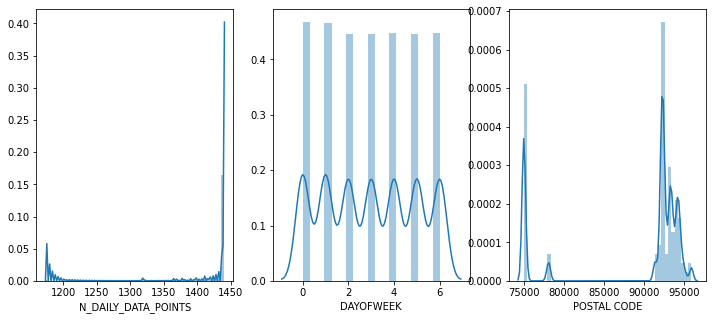

In [20]:
# Visualizing Univariate Data
# Histogram
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12,5))
sns.distplot(df['N_DAILY_DATA_POINTS'],ax = ax1)
sns.distplot(df['DAYOFWEEK'],ax = ax2)
sns.distplot(df['POSTAL CODE'],ax = ax3)

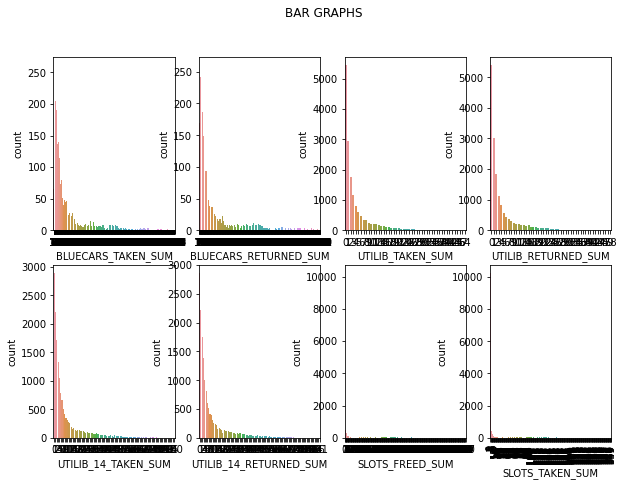

In [21]:
# To visualize numerical data
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

plt.xticks(rotation=90)
sns.countplot(df['BLUECARS_TAKEN_SUM'], ax=ax1)
sns.countplot(df['BLUECARS_RETURNED_SUM'], ax=ax2)
sns.countplot(df['UTILIB_TAKEN_SUM'], ax=ax3)
sns.countplot(df['UTILIB_RETURNED_SUM'], ax=ax4)
sns.countplot(df['UTILIB_14_TAKEN_SUM'], ax=ax5)
sns.countplot(df['UTILIB_14_RETURNED_SUM'], ax=ax6)
sns.countplot(df['SLOTS_FREED_SUM'], ax=ax7)
sns.countplot(df['SLOTS_TAKEN_SUM'], ax=ax8)

BIVARIATE ANALYSIS

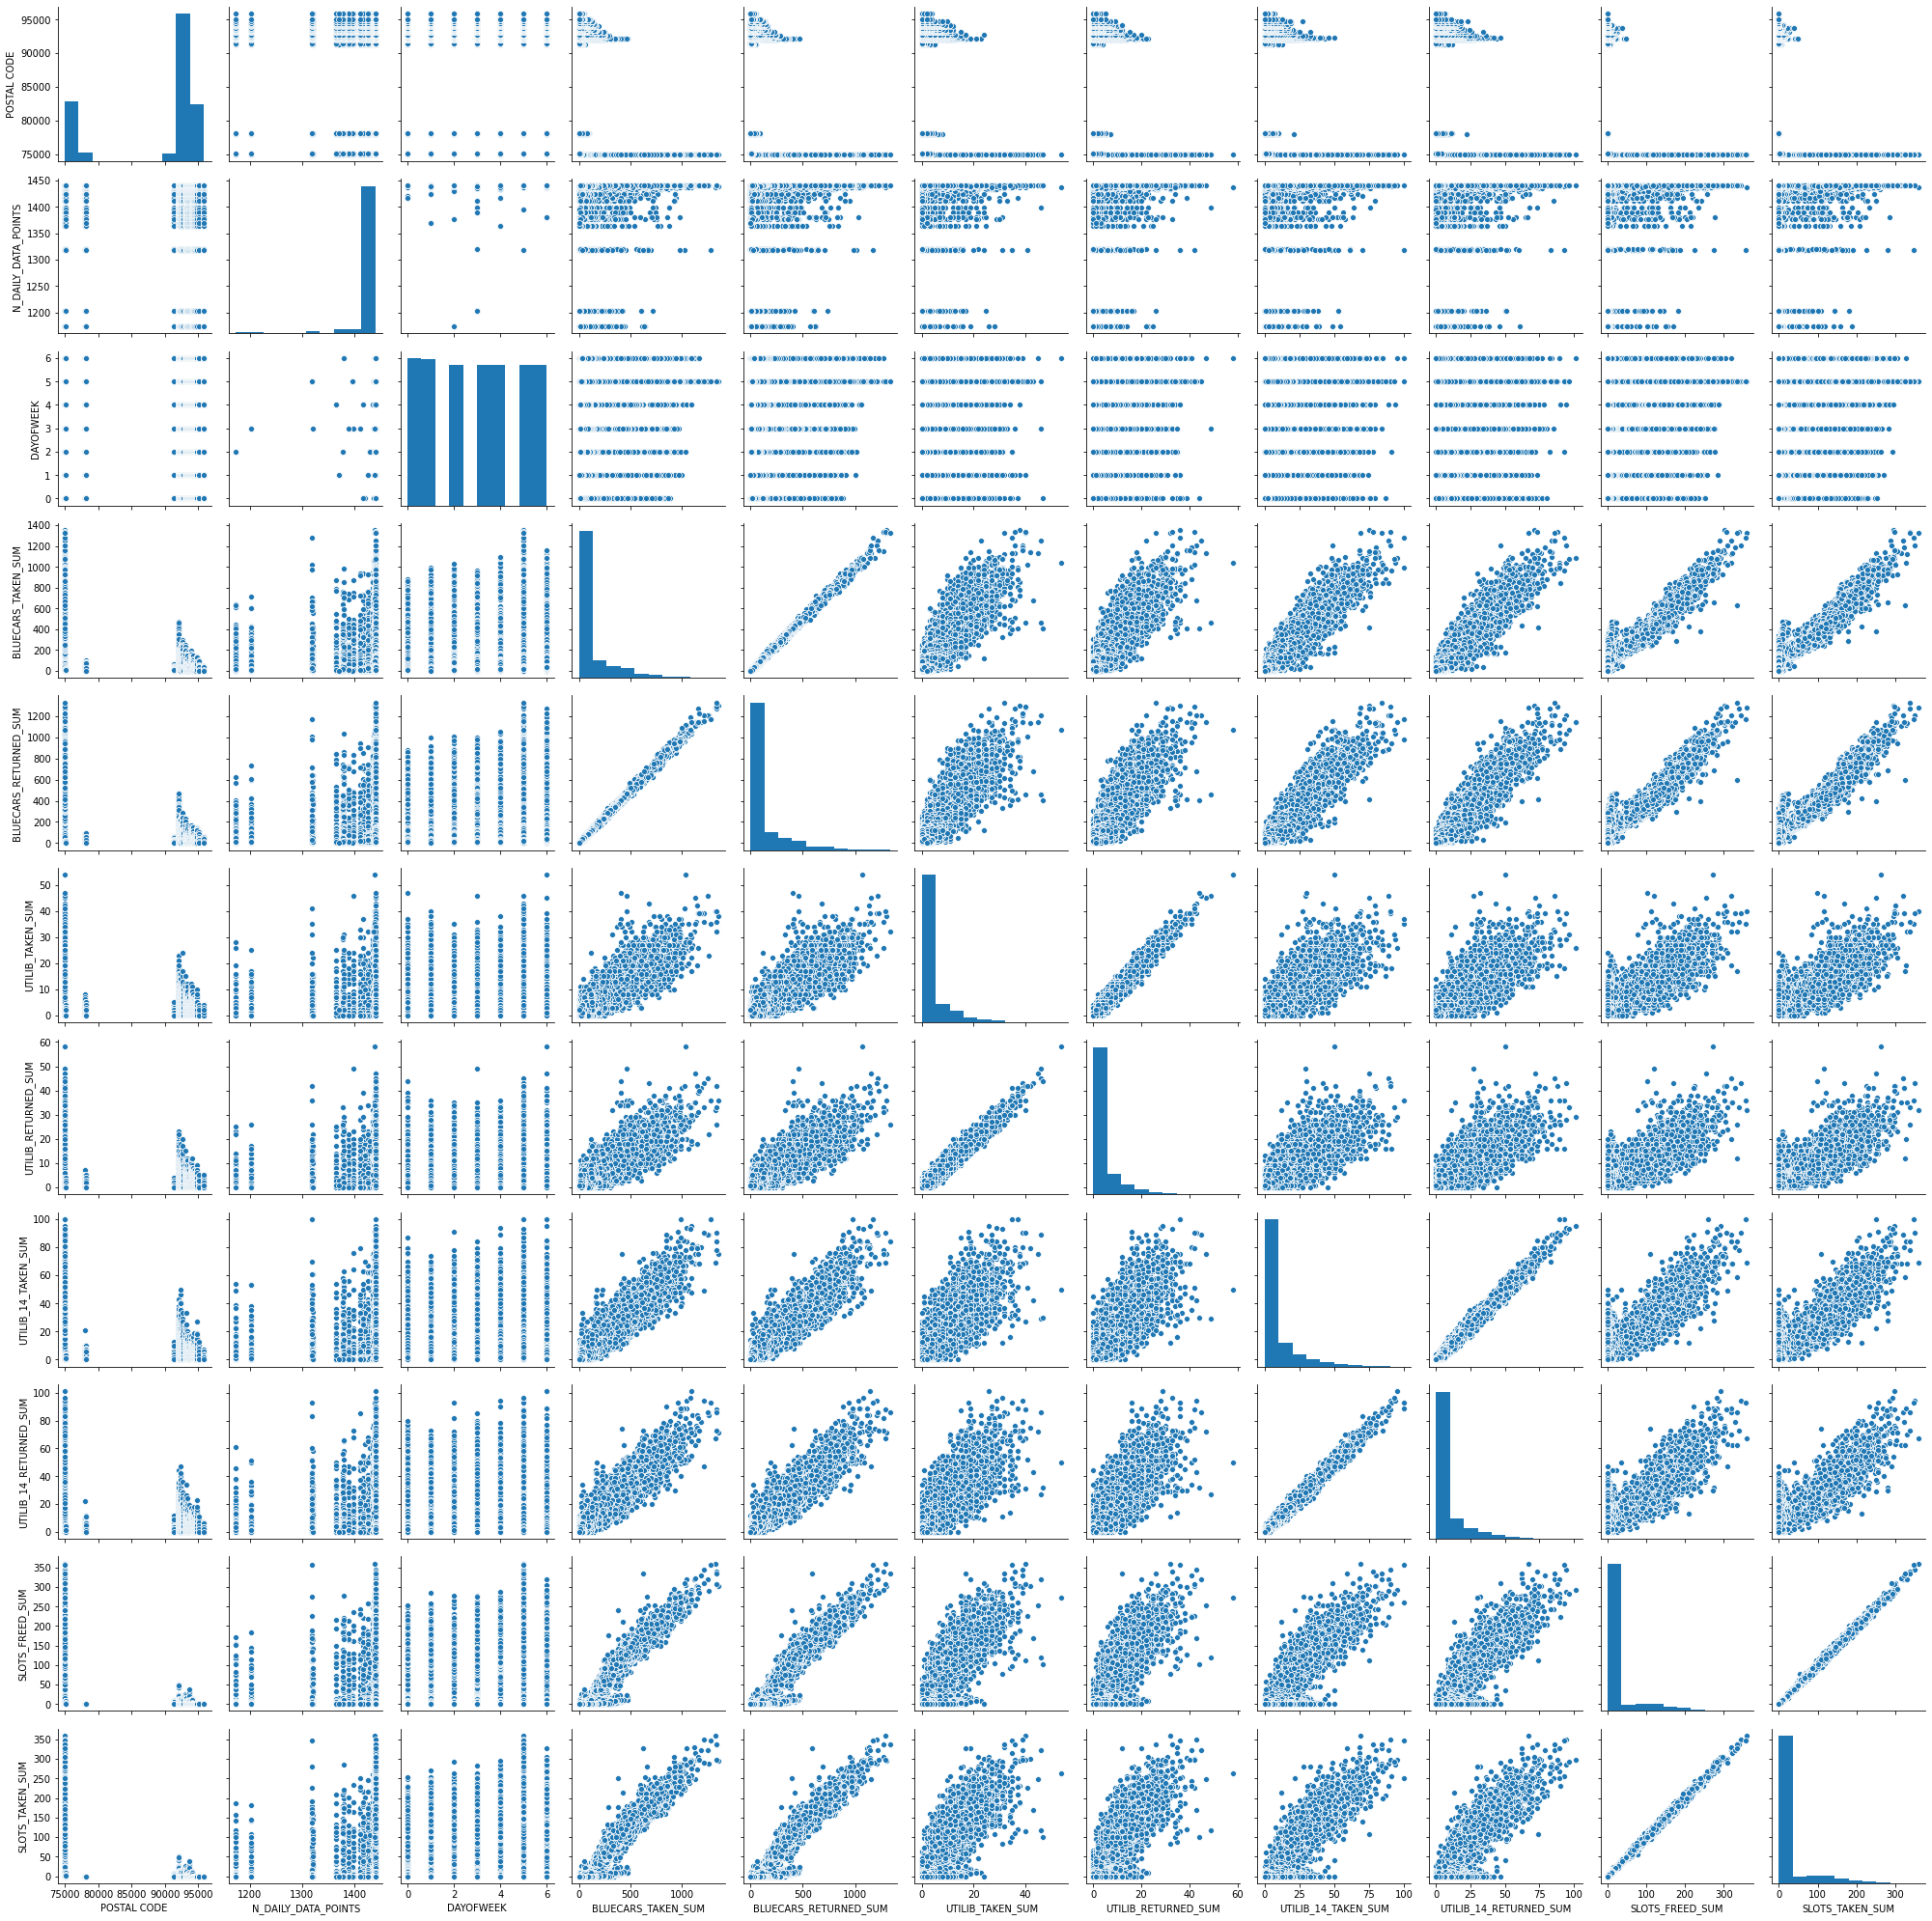

In [22]:
# Ploting the bivariate summaries
sns.pairplot(df)
plt.show()

In [23]:
# The summaries of correlation
df.corr()

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
POSTAL CODE,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
N_DAILY_DATA_POINTS,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
DAYOFWEEK,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BLUECARS_TAKEN_SUM,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BLUECARS_RETURNED_SUM,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
UTILIB_TAKEN_SUM,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
UTILIB_RETURNED_SUM,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
UTILIB_14_TAKEN_SUM,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
UTILIB_14_RETURNED_SUM,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
SLOTS_FREED_SUM,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


Text(0.5, 1.0, 'DAY OF WEEK AND N_DAILY_DATA_POINTS')

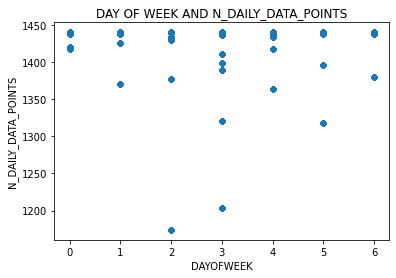

In [24]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND N_DAILY_DATA_POINTS
df.plot(x= 'DAYOFWEEK', y= 'N_DAILY_DATA_POINTS', kind = "scatter")
plt.title("DAY OF WEEK AND N_DAILY_DATA_POINTS")


Text(0.5, 1.0, 'DAY OF WEEK AND BLUECARS_TAKEN_SUM')

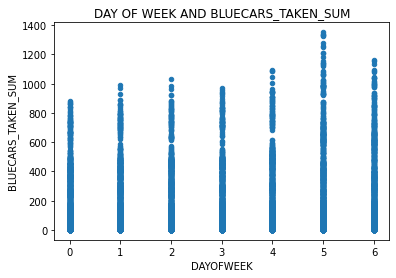

In [25]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND BLUECARS_TAKEN_SUM
df.plot(x= 'DAYOFWEEK', y= 'BLUECARS_TAKEN_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND BLUECARS_TAKEN_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND BLUECARS_RETURNED_SUM')

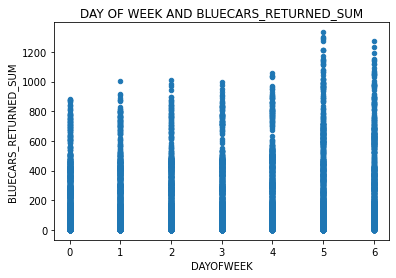

In [26]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND BLUECARS_RETURNED_SUM
df.plot(x= 'DAYOFWEEK', y= 'BLUECARS_RETURNED_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND BLUECARS_RETURNED_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND UTILIB_TAKEN_SUM ')

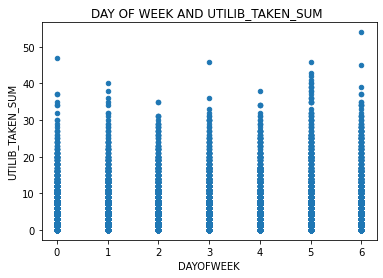

In [27]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND UTILIB_TAKEN_SUM 
df.plot(x= 'DAYOFWEEK', y= 'UTILIB_TAKEN_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND UTILIB_TAKEN_SUM ")

Text(0.5, 1.0, 'DAY OF WEEK AND UTILIB_RETURNED_SUM')

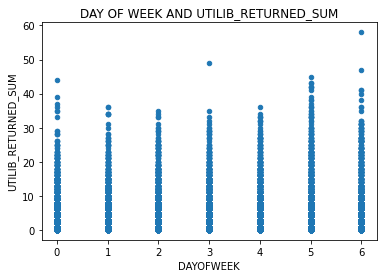

In [28]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND UTILIB_RETURNED_SUM
df.plot(x= 'DAYOFWEEK', y= 'UTILIB_RETURNED_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND UTILIB_RETURNED_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND UTILIB_14_TAKEN_SUM')

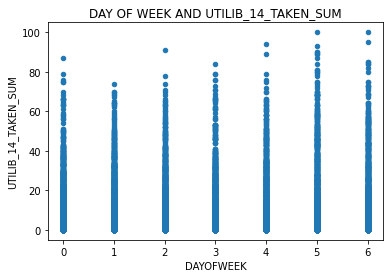

In [29]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND UTILIB_14_TAKEN_SUM
df.plot(x= 'DAYOFWEEK', y= 'UTILIB_14_TAKEN_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND UTILIB_14_TAKEN_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND UTILIB_14_RETURNED_SUM')

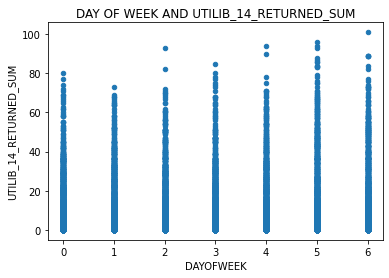

In [30]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND UTILIB_14_RETURNED_SUM
df.plot(x= 'DAYOFWEEK', y= 'UTILIB_14_RETURNED_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND UTILIB_14_RETURNED_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND SLOTS_FREED_SUM')

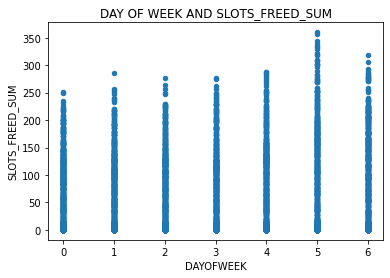

In [31]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND SLOTS_FREED_SUM
df.plot(x= 'DAYOFWEEK', y= 'SLOTS_FREED_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND SLOTS_FREED_SUM")

Text(0.5, 1.0, 'DAY OF WEEK AND SLOTS_TAKEN_SUM')

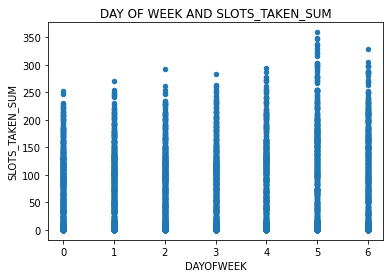

In [32]:
 # VISUALIZING RELATIONSHIP BETWEEN DAY OF WEEK AND SLOTS_TAKEN_SUM
df.plot(x= 'DAYOFWEEK', y= 'SLOTS_TAKEN_SUM', kind = "scatter")
plt.title("DAY OF WEEK AND SLOTS_TAKEN_SUM")

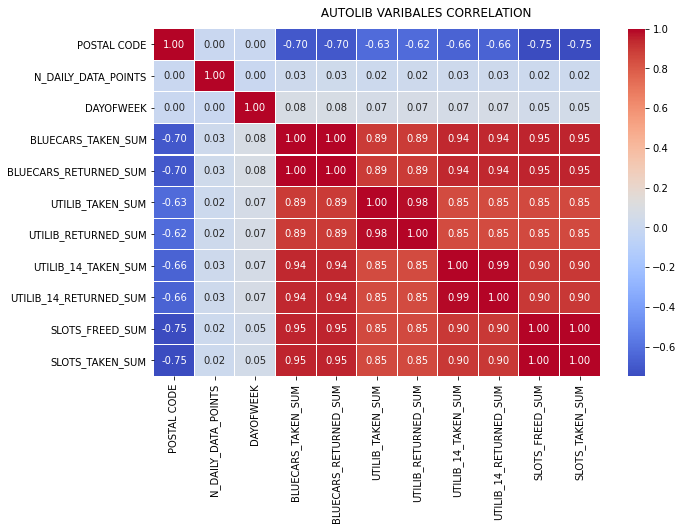

In [33]:
#CORRELATION PLOT BETWEEN FACTORS
f , ax = plt.subplots(figsize = (10,6))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle(' AUTOLIB VARIBALES CORRELATION')

# SAMPLING


In [34]:
# Simple random sampling
df2 =df.sample(frac=0.04)
df2

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
6899,92260,2/8/2018,1438,3,weekday,24,31,2,1,1,2,0,0
3896,78150,6/17/2018,1440,6,weekend,75,59,0,0,6,5,0,0
12557,93600,3/3/2018,1440,5,weekend,21,24,1,0,3,4,0,0
14336,94220,5/6/2018,1439,6,weekend,54,57,0,0,3,3,0,0
15378,94700,3/18/2018,1440,6,weekend,42,38,1,2,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,92420,6/6/2018,1440,2,weekday,10,8,0,0,1,1,0,0
12987,94000,1/21/2018,1440,6,weekend,108,127,1,2,17,14,0,0
15868,95870,4/9/2018,1440,0,weekday,10,14,0,0,0,0,0,0
2929,75019,5/5/2018,1440,5,weekend,738,701,31,34,54,50,209,206


In [38]:
# To view the statistics of our sample
df2.describe()

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,88718.261275,1432.704510,2.903577,121.567652,122.636081,3.520995,3.580093,8.367030,8.306376,21.559876,21.782271
std,7647.820206,27.191082,2.062883,188.222294,190.008382,5.747337,5.932988,13.084876,13.043937,51.745520,52.247248
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,17.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92330.000000,1440.000000,3.000000,42.000000,43.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93370.000000,1440.000000,5.000000,126.000000,126.500000,4.000000,4.000000,9.500000,9.000000,4.000000,3.000000
max,95880.000000,1440.000000,6.000000,1338.000000,1294.000000,42.000000,42.000000,90.000000,88.000000,308.000000,299.000000


In [42]:
# To calculate p-value
zscore = -0.664419
 #p-value
from scipy.stats import norm
prob = norm.cdf(zscore)
print("The p-value:",prob)
if prob < 0.05:
  print("I reject the null hypothesis.")
else:
  print("I neither reject the null hypothesis nor do I accept it.")


The p-value: 0.25321108779524026
I neither reject the null hypothesis nor do I accept it.
